In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl;
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix


%matplotlib inline

import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import library from my src folder    
from src.helpers import identify_highly_correlated_features, one_hot, identify_low_variance_features, identify_missing_data, feature_importance_plot
from src.learning_curve_plot import learning_curve_plot


In [13]:
songs_data = pd.read_pickle("../data/songs_data_final.pkl")

In [14]:
target = songs_data["genre"]
features = songs_data.drop(["genre"], axis = 1)

In [15]:
X_train, X_test, y_train_xgb, y_test_xgb = train_test_split(features, target, test_size = 0.2, random_state = 8888)

In [16]:
xgb = XGBRegressor()

In [17]:
xgb.fit(X_train, y_train_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [18]:
y_pred_xgb = xgb.predict(X_test)

In [19]:
print("first five predicted values:", y_pred_xgb[0:5])
print("first five actual values:", list(y_test_xgb[0:5]))

first five predicted values: [3.052215  4.8885074 4.023358  2.0429304 2.9022818]
first five actual values: [3, 5, 1, 3, 3]


C:\Users\oscar\AppData\Local\Temp\ipykernel_23752\2666105826.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("first five actual values:", list(y_test_xgb[0:5]))


In [20]:
# Evaluation metrics for the model on the training set

y_pred_train_xgb = xgb.predict(X_train)

print("accuracy:", round(accuracy_score(y_test_xgb, y_pred_xgb), 2))
print("recall:" , round(skl.metrics.recall_score(y_test_xgb, y_pred_xgb, average = 'weighted'), 2))
print("precision:", round(precision_score(y_test_xgb, y_pred_xgb, average = 'weighted'), 2))
print("f1-score:", round(f1_score(y_test_xgb, y_pred_xgb,  average = 'weighted'), 2))


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
plot_confusion_matrix(xgb, X_test, y_test_xgb, cmap = plt.cm.Blues);

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: plot_confusion_matrix only supports classifiers

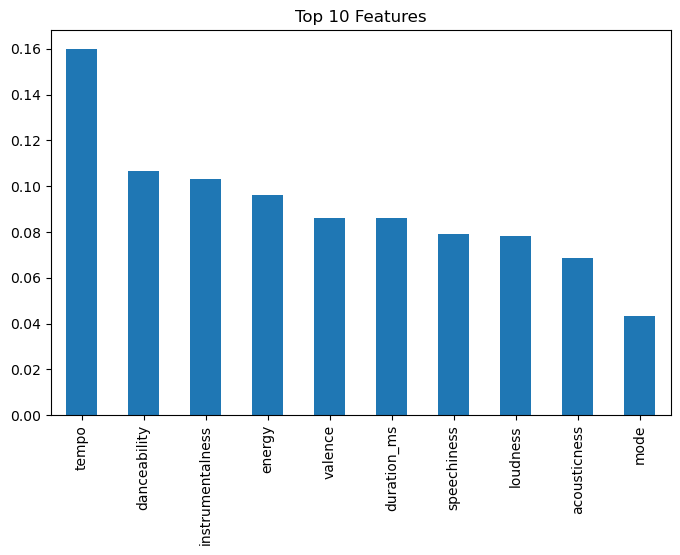

In [ ]:
feature_importance_plot(xgb, X_train,10)

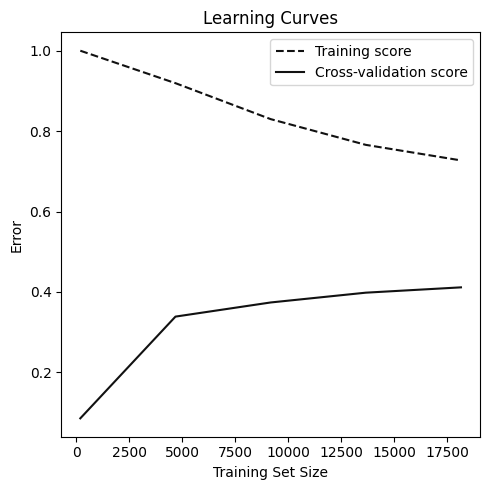

In [23]:
learning_curve_plot(xgb, X_train, y_train_xgb, scoring = 'r2')